Попробуем сделать pca на параметрах...

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                              AutoMinorLocator)
from sklearn.decomposition import PCA


from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_percentage_error,
    mean_absolute_error,
)

In [2]:
train_data = pd.read_csv("../data/processed/train.csv")
val_data = pd.read_csv("../data/processed/val.csv")
train_X, train_y = train_data.drop("pt_loss", axis=1), train_data["pt_loss"]
val_X, val_y = val_data.drop("pt_loss", axis=1), val_data["pt_loss"]

In [42]:
pca = PCA(n_components=5).fit(train_X.values)

No. of PC           Cumulative explained variance                                                   
--------------------------------------------------
1                   1.000000                                                                        
2                   1.000000                                                                        


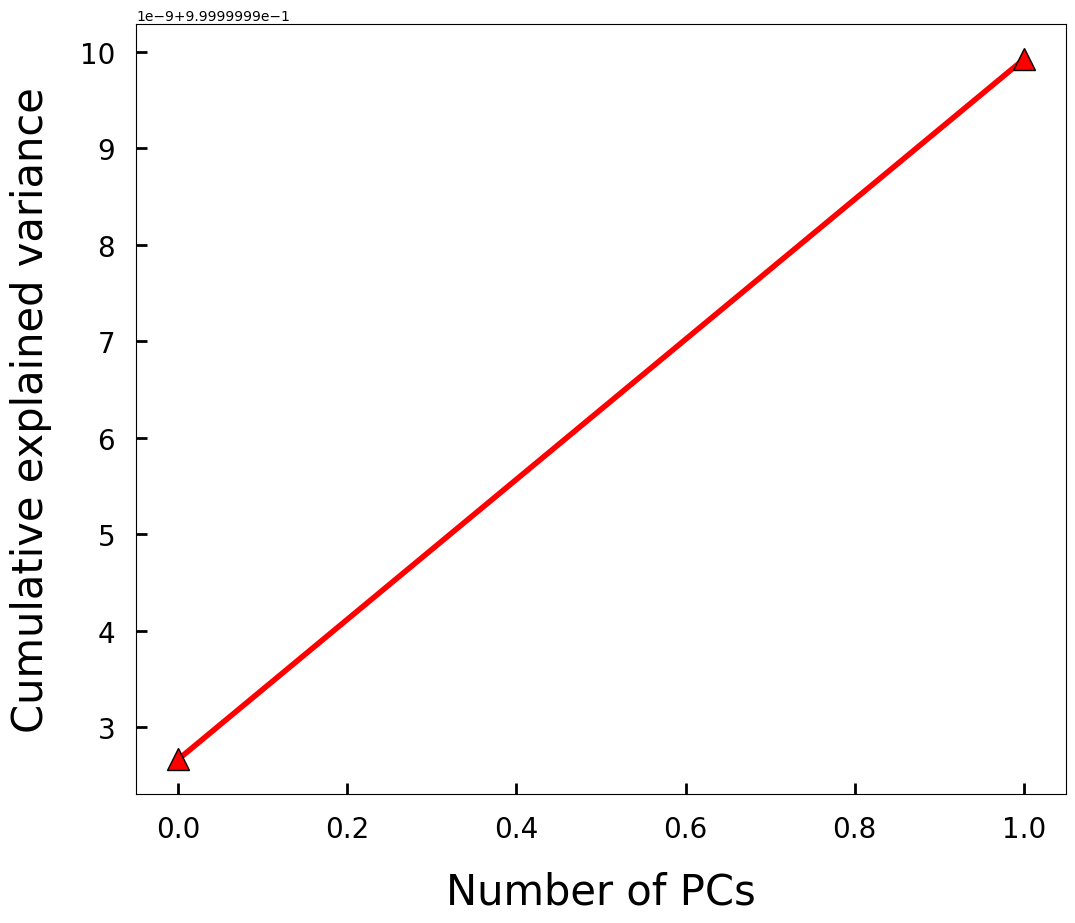

In [26]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of PCs', fontsize=30,labelpad=20)
ax1.set_ylabel('Cumulative explained variance', fontsize=30,labelpad=20)
ax1.tick_params(axis='both', which='major', direction='in', size=8, left='on', bottom='on', width=2, pad=15)
ax1.tick_params(axis='both', which='minor', direction='in', size=4, left='on', bottom='on',width=1, pad=15)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(axis="x", labelsize=20)

plt.gcf().set_size_inches((12, 10))
evr = np.cumsum(pca.explained_variance_ratio_)
ax1.plot(evr, marker='^',markersize=16, markeredgecolor='black', 
         linestyle='-',linewidth=4, color='red')   # Plotting

print('{:<20s}{:<80s}'.format('No. of PC','Cumulative explained variance'))
print(50*'-')
for i,a in enumerate(evr):
    if a<=1:
        print('{:<20d}{:<80f}'.format(i+1,a))

In [37]:
def fit_and_validate_model(
    model: Union[LinearRegression, SVR, GradientBoostingRegressor],
    train_X: np.ndarray,
    train_y: np.ndarray,
    val_X: np.ndarray,
    val_y: np.ndarray,
) -> Union[LinearRegression, SVR, GradientBoostingRegressor]:
    model = model.fit(train_X, train_y)
    val_preds = model.predict(val_X)
    r2 = r2_score(val_y, val_preds)
    mape = mean_absolute_percentage_error(val_y, val_preds)
    mse = mean_squared_error(val_y, val_preds)
    mae = mean_absolute_error(val_y, val_preds)
    print(f"Validation R2 score: {r2}")
    print(f"MAPE: {mape}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    return model, {"r2": r2, "mape": mape, "mae": mae, "mse": mse}


def get_test_score(
    model: Union[LinearRegression, SVR, GradientBoostingRegressor],
    X: np.ndarray,
    y: np.ndarray,
) -> None:
    print(f"Validation R2 score: {r2_score(y, model.predict(X))}")
    print(f"MSE: {mean_squared_error(y, model.predict(X))}")
    return None

In [43]:
pca_train_X = pca.transform(train_X.values)
pca_val_X = pca.transform(val_X.values)

In [44]:
gp, gp_metrics = fit_and_validate_model(
    GaussianProcessRegressor(), pca_train_X, train_y.values, pca_val_X, val_y.values
)

Validation R2 score: -1064.2630544846415
MAPE: 3.186614401078239
MAE: 0.5470909824300781
MSE: 17.113476617280515


In [45]:
lin_reg, lin_reg_metrics = fit_and_validate_model(
    LinearRegression(), pca_train_X, train_y.values, pca_val_X, val_y.values
)

Validation R2 score: 0.40736700847910656
MAPE: 0.5715085672672493
MAE: 0.0825740220089395
MSE: 0.00952066327685453


In [46]:
svm_rbf_kernel, svm_rbf_kernel_metrics = fit_and_validate_model(
    SVR(kernel="rbf"), pca_train_X, train_y.values, pca_val_X, val_y.values
)

Validation R2 score: 0.020528661005631554
MAPE: 0.8419422125971976
MAE: 0.10497287246482913
MSE: 0.015735230642431174


In [48]:
rand_forest, rand_forest_metrics = fit_and_validate_model(
    RandomForestRegressor(),
    pca_train_X,
    train_y.values,
    pca_val_X,
    val_y.values,
)

Validation R2 score: 0.2338502549179846
MAPE: 0.5436645809033767
MAE: 0.0863403558974359
MSE: 0.01230821410035631
